In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress


In [170]:
# File to Load (Remember to Change These)
file= "case_demographics_ethnicity.csv"

# Read Purchasing File and store into Pandas data frame
df= pd.read_csv(file)


In [171]:
df

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
0,Latino,5276,35.99,170,28.38,38.9,4/13/2020
1,Latino,5910,37.18,203,29.72,38.9,4/14/2020
2,Latino,6433,37.8,226,29.7,38.9,4/15/2020
3,Latino,7013,38.51,254,29.85,38.9,4/16/2020
4,Latino,7627,39.41,281,30.58,38.9,4/17/2020
...,...,...,...,...,...,...,...
5086,Multi-Race,40752,1.5,626,1.3,2.2,2/24/2021
5087,American Indian or Alaska Native,8770,0.3,167,0.3,0.5,2/24/2021
5088,Native Hawaiian and other Pacific Islander,15097,0.6,302,0.6,0.3,2/24/2021
5089,Other,306466,11.5,1084,2.2,0,2/24/2021


In [172]:
df.count()

race_ethnicity           5091
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [173]:
#Dropping lines with no data

Ethnicity_df=df.dropna(how="any")
Ethnicity_df.count()

race_ethnicity           5089
cases                    5089
case_percentage          5089
deaths                   5089
death_percentage         5089
percent_ca_population    5089
date                     5089
dtype: int64

In [174]:
Ethnicity_df.nunique()


race_ethnicity             11
cases                    2461
case_percentage           402
deaths                   1431
death_percentage          380
percent_ca_population       9
date                      319
dtype: int64

In [175]:
Ethnicity_df["race_ethnicity"].value_counts()

White                                         636
Latino                                        636
Other                                         636
American Indian or Alaska Native              636
Black                                         636
Asian                                         636
Multi-Race                                    538
Native Hawaiian and other Pacific Islander    538
Native Hawaiian or Pacific Islander            98
Multiracial                                    98
race_ethnicity                                  1
Name: race_ethnicity, dtype: int64

In [176]:
Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="race_ethnicity", : ]

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
2545,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date


In [177]:
#Cleaning up Ethnicity colmn 

Ethnicity_df=Ethnicity_df.loc[(Ethnicity_df["race_ethnicity"]!="race_ethnicity")]
Ethnicity_df["race_ethnicity"].value_counts()

White                                         636
Latino                                        636
Other                                         636
American Indian or Alaska Native              636
Black                                         636
Asian                                         636
Multi-Race                                    538
Native Hawaiian and other Pacific Islander    538
Native Hawaiian or Pacific Islander            98
Multiracial                                    98
Name: race_ethnicity, dtype: int64

In [178]:
Ethnicity_df.describe()

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
count,5088,5088,5088,5088,5088,5088,5088
unique,10,2460,401,1430,379,8,318
top,White,683,0.3,14,0.5,36.6,11/8/2020
freq,636,6,330,60,484,636,16


In [179]:
#Varifying dates are good 
Ethnicity_df["date"].nunique()


318

In [180]:
#Latino Cases Per month 

Latino=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Latino"]
Latino_April=Latino.iloc[0:18, 0:7]
Latino_May=Latino.iloc[18:49, 0:7]
Latino_June=Latino.iloc[49:79, 0:7]
Latino_July=Latino.iloc[79:111, 0:7]
Latino_August=Latino.iloc[111:141, 0:7]
Latino_September=Latino.iloc[141:171, 0:7]
Latino_October=Latino.iloc[171:202, 0:7]
Latino_November=Latino.iloc[202:232, 0:7]
Latino_December=Latino.iloc[232:263, 0:7]
Latino_January=Latino.iloc[263:294, 0:7]
Latino_February=Latino.iloc[294:318, 0:7]


In [181]:
#White cases per month 

White=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="White"]
White_April=White.iloc[0:18, 0:7]
White_May=White.iloc[18:49, 0:7]
White_June=White.iloc[49:79, 0:7]
White_July=White.iloc[79:111, 0:7]
White_August=White.iloc[111:141, 0:7]
White_September=White.iloc[141:171, 0:7]
White_October=White.iloc[171:202, 0:7]
White_November=White.iloc[202:232, 0:7]
White_December=White.iloc[232:263, 0:7]
White_January=White.iloc[263:294, 0:7]
White_February=White.iloc[294:318, 0:7]


In [182]:
#Other cases per month 

Other=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Other"]
Other_April=Other.iloc[0:18, 0:7]
Other_May=Other.iloc[18:49, 0:7]
Other_June=Other.iloc[49:79, 0:7]
Other_July=Other.iloc[79:111, 0:7]
Other_August=Other.iloc[111:141, 0:7]
Other_September=Other.iloc[141:171, 0:7]
Other_October=Other.iloc[171:202, 0:7]
Other_November=Other.iloc[202:232, 0:7]
Other_December=Other.iloc[232:263, 0:7]
Other_January=Other.iloc[263:294, 0:7]
Other_February=Other.iloc[294:318, 0:7]

In [183]:
#American Indian or Alaska Native  cases per month 

Idian_Alaska=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="American Indian or Alaska Native "]
Idian_Alaska_April=Idian_Alaska.iloc[0:18, 0:7]
Idian_Alaska_May=Idian_Alaska.iloc[18:49, 0:7]
Idian_Alaska_June=Idian_Alaska.iloc[49:79, 0:7]
Idian_Alaska_July=Idian_Alaska.iloc[79:111, 0:7]
Idian_Alaska_August=Idian_Alaska.iloc[111:141, 0:7]
Idian_Alaska_September=Idian_Alaska.iloc[141:171, 0:7]
Idian_Alaska_October=Idian_Alaska.iloc[171:202, 0:7]
Idian_Alaska_November=Idian_Alaska.iloc[202:232, 0:7]
Idian_Alaska_December=Idian_Alaska.iloc[232:263, 0:7]
Idian_Alaska_January=Idian_Alaska.iloc[263:294, 0:7]
Idian_Alaska_February=Idian_Alaska.iloc[294:318, 0:7]                              

In [184]:
#Black cases per month 

Black=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Black"]
Black_April=Black.iloc[0:18, 0:7]
Black_May=Black.iloc[18:49, 0:7]
Black_June=Black.iloc[49:79, 0:7]
Black_July=Black.iloc[79:111, 0:7]
Black_August=Black.iloc[111:141, 0:7]
Black_September=Black.iloc[141:171, 0:7]
Black_October=Black.iloc[171:202, 0:7]
Black_November=Black.iloc[202:232, 0:7]
Black_December=Black.iloc[232:263, 0:7]
Black_January=Black.iloc[263:294, 0:7]
Black_February=Black.iloc[294:318, 0:7]


In [185]:
#Asian cases per month 

Asian=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Asian"]
Asian_April=Asian.iloc[0:18, 0:7]
Asian_May=Asian.iloc[18:49, 0:7]
Asian_June=Asian.iloc[49:79, 0:7]
Asian_July=Asian.iloc[79:111, 0:7]
Asian_August=Asian.iloc[111:141, 0:7]
Asian_September=Asian.iloc[141:171, 0:7]
Asian_October=Asian.iloc[171:202, 0:7]
Asian_November=Asian.iloc[202:232, 0:7]
Asian_December=Asian.iloc[232:263, 0:7]
Asian_January=Asian.iloc[263:294, 0:7]
Asian_February=Asian.iloc[294:318, 0:7]

In [186]:
#Multi-Race cases per month 

Multi_Race=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Multi-Race"]
Multi_Race_April=Multi_Race.iloc[0:18, 0:7]
Multi_Race_May=Multi_Race.iloc[18:49, 0:7]
Multi_Race_June=Multi_Race.iloc[49:79, 0:7]
Multi_Race_July=Multi_Race.iloc[79:111, 0:7]
Multi_Race_August=Multi_Race.iloc[111:141, 0:7]
Multi_Race_September=Multi_Race.iloc[141:171, 0:7]
Multi_Race_October=Multi_Race.iloc[171:202, 0:7]
Multi_Race_November=Multi_Race.iloc[202:232, 0:7]
Multi_Race_December=Multi_Race.iloc[232:263, 0:7]
Multi_Race_January=Multi_Race.iloc[263:294, 0:7]
Multi_Race_February=Multi_Race.iloc[294:318, 0:7]

In [187]:
#Native Hawaiian and other Pacific Islander  cases per month 

Hawaiian_Pacific=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Native Hawaiian and other Pacific Islander "]
Hawaiian_Pacific_April=Hawaiian_Pacific.iloc[0:18, 0:7]
Hawaiian_Pacific_May=Hawaiian_Pacific.iloc[18:49, 0:7]
Hawaiian_Pacific_June=Hawaiian_Pacific.iloc[49:79, 0:7]
Hawaiian_Pacific_July=Hawaiian_Pacific.iloc[79:111, 0:7]
Hawaiian_Pacific_August=Hawaiian_Pacific.iloc[111:141, 0:7]
Hawaiian_Pacific_September=Hawaiian_Pacific.iloc[141:171, 0:7]
Hawaiian_Pacific_October=Hawaiian_Pacific.iloc[171:202, 0:7]
Hawaiian_Pacific_November=Hawaiian_Pacific.iloc[202:232, 0:7]
Hawaiian_Pacific_December=Hawaiian_Pacific.iloc[232:263, 0:7]
Hawaiian_Pacific_January=Hawaiian_Pacific.iloc[263:294, 0:7]
Hawaiian_Pacific_February=Hawaiian_Pacific.iloc[294:318, 0:7]

In [188]:
#Native Hawaiian or Pacific Islander  cases per month 

Pacific_Islander=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Native Hawaiian or Pacific Islander "]
Pacific_Islander_April=Pacific_Islander.iloc[0:18, 0:7]
Pacific_Islander_May=Pacific_Islander.iloc[18:49, 0:7]
Pacific_Islander_June=Pacific_Islander.iloc[49:79, 0:7]
Pacific_Islander_July=Pacific_Islander.iloc[79:111, 0:7]
Pacific_Islander_August=Pacific_Islander.iloc[111:141, 0:7]
Pacific_Islander_September=Pacific_Islander.iloc[141:171, 0:7]
Pacific_Islander_October=Pacific_Islander.iloc[171:202, 0:7]
Pacific_Islander_November=Pacific_Islander.iloc[202:232, 0:7]
Pacific_Islander_December=Pacific_Islander.iloc[232:263, 0:7]
Pacific_Islander_January=Pacific_Islander.iloc[263:294, 0:7]
Pacific_Islander_February=Pacific_Islander.iloc[294:318, 0:7]

In [189]:
#Multiracial cases per month 

Multiracial=Ethnicity_df.loc[Ethnicity_df["race_ethnicity"]=="Multiracial"]
Multiracial_April=Asian.iloc[0:18, 0:7]
Multiracial_May=Asian.iloc[18:49, 0:7]
Multiracial_June=Asian.iloc[49:79, 0:7]
Multiracial_July=Asian.iloc[79:111, 0:7]
Multiracial_August=Asian.iloc[111:141, 0:7]
Multiracial_September=Asian.iloc[141:171, 0:7]
Multiracial_October=Asian.iloc[171:202, 0:7]
Multiracial_November=Asian.iloc[202:232, 0:7]
Multiracial_December=Asian.iloc[232:263, 0:7]
Multiracial_January=Asian.iloc[263:294, 0:7]
Multiracial_February=Asian.iloc[294:318, 0:7]


In [190]:
#Creating Data drame to hold month of april cases by race 
April_df=pd.DataFrame({"White":[White_April],
                      "Latino":[Latino_April],
                      "other":[Other_April],
                      "American Indian or Alaska Native":[Idian_Alaska_April],
                      "Black":[Black_April],
                      "Asian":[Asian_April],
                      "Multi-Race":[Multi_Race],
                      "Native Hawaiian and other Pacific Islander":[Hawaiian_Pacific_April],
                      "Native Hawaiian or Pacific Islander":[Pacific_Islander_April],
                      "Multiracial":[Multiracial_April]
                      })
# April_df=pd.DataFrame(Apr_cases, columns=["White","Latino","other","American Indian or Alaska Native","Black","Asian","Multi-Race","Native Hawaiian and other Pacific Islander","Native Hawaiian or Pacific Islander","Multiracial"])
                    
April_df

,White,Latino,other,American Indian or Alaska Native,Black,Asian,Multi-Race,Native Hawaiian and other Pacific Islander,Native Hawaiian or Pacific Islander,Multiracial
0,race_ethnicity cases case_percentage deaths...,race_ethnicity cases case_percentage death...,race_ethnicity cases case_percentage death...,"Empty DataFrame Columns: [race_ethnicity, case...",race_ethnicity cases case_percentage death...,race_ethnicity cases case_percentage deaths...,race_ethnicity cases case_percentage dea...,"Empty DataFrame Columns: [race_ethnicity, case...","Empty DataFrame Columns: [race_ethnicity, case...",race_ethnicity cases case_percentage deaths...


In [201]:
Ethnicity_df.head()

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
0,Latino,5276,35.99,170,28.38,38.9,4/13/2020
1,Latino,5910,37.18,203,29.72,38.9,4/14/2020
2,Latino,6433,37.8,226,29.7,38.9,4/15/2020
3,Latino,7013,38.51,254,29.85,38.9,4/16/2020
4,Latino,7627,39.41,281,30.58,38.9,4/17/2020


([<matplotlib.patches.Wedge at 0x1c8427e59a0>,
 [Text(-1.1444603408978722, 0.360846959405128, 'Latino'),
  Text(-1.020062458154955, -0.5310109052202888, 'White'),
  Text(-0.34581166942991487, -1.0967744933604608, 'Asian'),
  Text(0.5310109052202883, -1.0200624581549556, 'Black'),
  Text(1.0967744933604608, -0.3458116694299149, 'Multiracial'),
  Text(1.0200624581549556, 0.5310109052202883, 'American Indian or Alaska Native'),
  Text(0.41150437323132744, 1.0738548089995652, 'Native Hawaiian or Pacific Islander'),
  Text(-0.3528294652313839, 1.1469574396918727, 'Other'),
  Text(-0.7648935203708943, 0.9246285213503964, 'Multi-Race'),
  Text(-0.8709250906075954, 0.8255237649820578, 'Native Hawaiian and other Pacific Islander')],
 [Text(-0.6676018655237588, 0.21049405965299134, '12.5%'),
  Text(-0.5765570415658441, -0.30013659860277186, '12.5%'),
  Text(-0.19545876967777795, -0.6199160179863473, '12.5%'),
  Text(0.3001365986027716, -0.5765570415658443, '12.5%'),
  Text(0.6199160179863473, -0

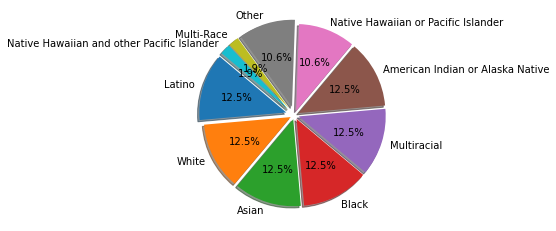

In [191]:
explode= (0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.1,0.1)

sizes= Ethnicity_df["race_ethnicity"].value_counts()

labels=Ethnicity_df["race_ethnicity"].unique()

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

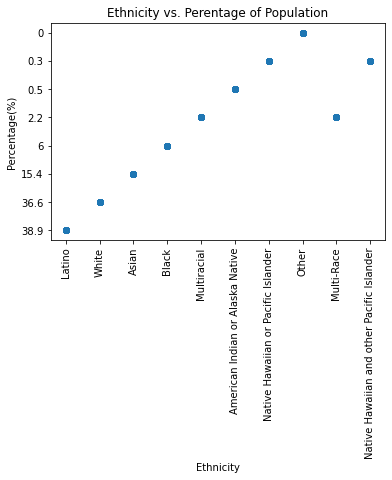

In [203]:
Bar1= Ethnicity_df[["race_ethnicity","cases","deaths","percent_ca_population"]]

x_values = Bar1["race_ethnicity"]
y_values = Bar1["percent_ca_population"]


plt.scatter(x_values,y_values)
plt.xticks(rotation="vertical")
plt.title("Ethnicity vs. Perentage of Population")
plt.xlabel('Ethnicity')
plt.ylabel('Percentage(%)')
plt.show()